In [1]:
import numpy as np;
from scipy.optimize import minimize 
import time
import matplotlib.pyplot as plt
import sklearn.linear_model
import cv2

In [2]:
from ten_compl import am

In [3]:
def load_yuv_img(height, width, frames, path):
    f = open(path, 'rb') 
    
    ten_vid = np.zeros((frames, h, w))
    for i in range(frames):
        # Read Y, U and V color channels and reshape to height*1.5 x width numpy array
        yuv = np.frombuffer(f.read(width*height*3//2), dtype=np.uint8).reshape((height*3//2, width))

        # Convert YUV420 to BGR (for testing), applies BT.601 "Limited Range" conversion.
        bgr = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR_I420)

        # Convert YUV420 to Grayscale
        gray = cv2.cvtColor(yuv, cv2.COLOR_YUV2GRAY_I420)
        ten_vid[i] = gray
        #Show RGB image and Grayscale image for testing
        res = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        #plt.imshow(res)
        #cv2.waitKey(500)  # Wait a 0.5 second (for testing)
        #plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
        #cv2.waitKey(500)  # Wait a 0.5 second (for testing)
    plt.imshow(ten_vid[0], cmap='gray', vmin=0, vmax=255)
    f.close()
    return ten_vid
    



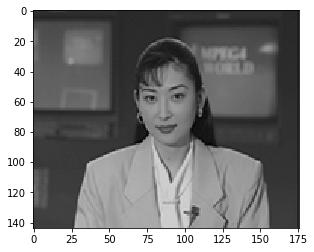

In [4]:
#img = np.fromfile('../data/akiyo_qcif.yuv', dtype = 'uint8')
#img = cv2.imread('../data/akiyo_qcif.yuv');
#byteArr = np.array(img)
h = 144
w = 176

akiyo_path = '/data/akiyo_qcif.yuv'
frames = 300


width = w
height = h
#sale_path = '../data/salesman_qcif.yuv'
#frames = 449

ten_vid = load_yuv_img(height, width, frames, akiyo_path)


In [86]:
fr_bound = 50
n = (fr_bound, height, width)
nx, ny, nz = n
m = 7
num_entries = 30000
num_test_entries = 10000

test_entries = am.generate_ten_entries1(ten_vid[:fr_bound]/50, n, num_test_entries, seed = 2023)
test_entries = am.from_dict_to_arr(test_entries, num_test_entries)

entries_xyz = am.generate_ten_entries1(ten_vid[:fr_bound]/50, n, num_entries, seed = 2021)

X_0 = np.random.rand(nx*m).reshape((m, nx));
Y_0 = np.random.rand(ny*m).reshape((m, ny));
Z_0 = np.random.rand(nz*m).reshape((m, nz));

res_log, res = am.run_minimization(X_0, Y_0, Z_0, n, m, entries_xyz, num_entries, test_entries, max_iter = 50, tau = 0.4, mu = 10.0, lam = 1.0)

Score = 5365.927082739208, progress = 18126.60469692837, err = 280.5531566557069, nuc.norm = 715.2116986325636
eval_error_direct 0.774161
Score = 4198.909492190768, progress = 1167.0175905484402, err = 162.46869390281668, nuc.norm = 1439.5528336332056
eval_error_direct 0.450310
Score = 4197.619476002325, progress = 1.290016188442678, err = 164.6129778808335, nuc.norm = 1421.373925831268
eval_error_direct 0.456181
Score = 4197.612428547589, progress = 0.007047454736493819, err = 164.7733231768642, nuc.norm = 1420.0500135051109
eval_error_direct 0.456622
Score = 4197.612363732951, progress = 6.481463788077235e-05, err = 164.78477651010144, nuc.norm = 1419.9556176293736
eval_error_direct 0.456653
Minimization completed
Parameters are: mu = 10.0, nu = 1.0, err = 164.78477651010132
Scale changed. New scale: 4.0
Score = 5538.799166761433, progress = 695.3648895742335, err = 110.24309809543239, nuc.norm = 2009.8032910257712
eval_error_direct 0.304874
Score = 5489.167898577983, progress = 49.6

In [87]:
fr_bound = 50
n = (fr_bound, height, width)
nx, ny, nz = n
m = 20
num_entries = 30000
num_test_entries = 10000

test_entries = am.generate_ten_entries1(ten_vid[:fr_bound]/20, n, num_test_entries, seed = 2027)
test_entries = am.from_dict_to_arr(test_entries, num_test_entries)

entries_xyz = am.generate_ten_entries1(ten_vid[:fr_bound]/20, n, num_entries, seed = 2025)

X_0 = np.random.rand(nx*m).reshape((m, nx));
Y_0 = np.random.rand(ny*m).reshape((m, ny));
Z_0 = np.random.rand(nz*m).reshape((m, nz));

res_altmin_log, res_altmin = am.run_minimization1(X_0, Y_0, Z_0, n, m, entries_xyz, num_entries, test_entries, max_iter = 40, lam = 0.0)

Score = 115711.60700503056, progress = 106547.1370782961, err = 195.36263810216963, nuc.norm = 48314.16341095546
eval_error_direct 0.270127
Score = 112720.0964538837, progress = 2991.5105511468573, err = 103.0023260828907, nuc.norm = 53707.67843232031
eval_error_direct 0.156691
Score = 124236.4085876485, progress = -11516.312133764804, err = 79.53441206372689, nuc.norm = 60536.77361824358
eval_error_direct 0.133119
Score = 131267.4265121566, progress = -7031.017924508109, err = 72.18474334380107, nuc.norm = 64331.05396317569
eval_error_direct 0.126351
Score = 136856.387782897, progress = -5588.961270740401, err = 68.23778251177599, nuc.norm = 67264.09515091739
eval_error_direct 0.123621
Minimization completed
Parameters are: mu = 1.0, nu = 19159.144419676682, err = 68.23778251177623
Scale changed. New scale: 0.0005072377942398093
Score = 4390965.062569129, progress = 333515.8234924134, err = 65.67458284367761, nuc.norm = 69679.36723054523
eval_error_direct 0.122514


KeyboardInterrupt: 

In [88]:
m1 = m
X_res, Y_res, Z_res = res
our_ten = am.compute_tensor(X_res, Y_res, Z_res, n, m1).reshape(n)*20
#err = am.eval_error_direct(X_res, Y_res, Z_res, n, m1, ten_vid[:fr_bound].reshape(n))
#print('eval_error_direct %f' % err)
plt.imshow(our_ten[5, :, :], cmap='gray', vmin=0, vmax=255)
plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

In [34]:
res_altmin_log['test_err']

0     0.270499
1     0.216681
2     0.187654
3     0.170321
4     0.159823
5     0.152068
6     0.145750
7     0.140691
8     0.136752
9     0.133643
10    0.131105
11    0.128927
12    0.126999
13    0.125293
14    0.123786
15    0.122441
16    0.121222
17    0.120107
18    0.119085
19    0.118152
20    0.117304
21    0.116535
22    0.115836
23    0.115198
24    0.114615
25    0.114079
26    0.113584
27    0.113125
28    0.112698
29    0.112297
30    0.111921
31    0.111567
32    0.111233
33    0.110917
34    0.110620
35    0.110340
36    0.110077
37    0.109829
38    0.109594
39    0.109372
40    0.109162
41    0.108960
42    0.108768
43    0.108582
44    0.108404
45    0.108232
46    0.108065
47    0.107904
48    0.107747
49    0.107595
Name: test_err, dtype: float64